In [162]:
import numpy as np
import matplotlib.pyplot as plt

# KL Divergence between two 1D Gaussians
def kl_divergence_1d(mu_0, sigma_0, mu_1, sigma_1):
    term1 = np.log(sigma_1 / sigma_0)
    term2 = (sigma_0 ** 2 + (mu_0 - mu_1) ** 2) / (2 * sigma_1 ** 2)
    return term1 + term2 - 0.5

# Gradient of the KL Divergence for 1D Gaussians
def kl_gradient_1d(mu_0, sigma_0, mu_1, sigma_1):
    grad_mu = (mu_0 - mu_1) / sigma_1 ** 2
    grad_sigma = -(1 / sigma_0) + (sigma_0 / sigma_1 ** 2)
    return grad_mu, grad_sigma

# Natural gradient descent update for 1D Gaussians
def natural_gradient_descent_1d(mu_0, sigma_0, mu_1, sigma_1, learning_rate=0.01, epsilon=1e-3, max_iter=1e5):
    mu = mu_0
    sigma = sigma_0

    mu_history = [mu]
    sigma_history = [sigma]

    iterations = 0

    while True:
        grad_mu, grad_sigma = kl_gradient_1d(mu, sigma, mu_1, sigma_1)

        # Update mean and standard deviation using natural gradient
        mu -= learning_rate * sigma ** 2 * grad_mu
        sigma -= learning_rate * sigma ** 2 * grad_sigma / 2

        mu_history.append(mu)
        sigma_history.append(sigma)

        loss = kl_divergence_1d(mu, sigma, mu_1, sigma_1)

        iterations += 1

        if abs(loss) < epsilon or iterations >= max_iter:
            break

    print("Final Loss:", loss)
    print("Total iterations:", iterations)

    return np.array(mu_history), np.array(sigma_history)

# Regular gradient descent update for 1D Gaussians
def regular_gradient_descent_1d(mu_0, sigma_0, mu_1, sigma_1, learning_rate=0.01, epsilon=1e-3, max_iter=1e5):
    mu = mu_0
    sigma = sigma_0

    mu_history = [mu]
    sigma_history = [sigma]

    iterations = 0

    while True:
        grad_mu, grad_sigma = kl_gradient_1d(mu, sigma, mu_1, sigma_1)

        # Update mean and standard deviation using regular gradient
        mu -= learning_rate * grad_mu
        sigma -= learning_rate * grad_sigma

        mu_history.append(mu)
        sigma_history.append(sigma)

        loss = kl_divergence_1d(mu, sigma, mu_1, sigma_1)

        iterations += 1

        if abs(loss) < epsilon or iterations >= max_iter:
            break

    print("Final Loss:", loss)
    print("Total iterations:", iterations)

    return np.array(mu_history), np.array(sigma_history)

# Define the initial and target Gaussian distributions
mu_0 = 0.0   # Mean of the initial distribution
sigma_0 = 1.0  # Standard deviation of the initial distribution

mu_1 = 2.0   # Mean of the target distribution
sigma_1 = 2.0  # Standard deviation of the target distribution

# Perform natural gradient descent
learning_rate = 1e-1
epsilon = 1e-5

mu_history_natural, sigma_history_natural = natural_gradient_descent_1d(mu_0, sigma_0, mu_1, sigma_1, learning_rate, epsilon)
mu_history_regular, sigma_history_regular = regular_gradient_descent_1d(mu_0, sigma_0, mu_1, sigma_1, learning_rate, epsilon)

Final Loss: 9.73585473484917e-06
Total iterations: 67
Final Loss: 9.83891641692658e-06
Total iterations: 214


In [155]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# KL Divergence between two 1D Gaussians
def kl_divergence_1d(mu_0, var_0, mu_1, var_1):
    term1 = np.log(var_1 / var_0) / 2
    term2 = (var_0 + (mu_0 - mu_1) ** 2) / (2 * var_1)
    return term1 + term2 - 0.5

# Gradient of the KL Divergence for 1D Gaussians
def kl_gradient_1d(mu_0, var_0, mu_1, var_1):
    grad_mu = (mu_0 - mu_1) / var_1
    grad_var = - 1 / (2 * var_0) + 1 / (2 * var_1)
    return grad_mu, grad_var

# Natural gradient descent update for 1D Gaussians
def natural_gradient_descent_1d(mu_0, var_0, mu_1, var_1, learning_rate=0.01, epsilon=1e-3):
    mu = mu_0
    var = var_0

    mu_history = [mu]
    var_history = [var]

    iterations = 0

    while True:
        grad_mu, grad_var = kl_gradient_1d(mu, var, mu_1, var_1)

        # Update mean and variance using natural gradient
        mu -= learning_rate * var * grad_mu
        var -= learning_rate * 2 * var ** 2 * grad_var

        mu_history.append(mu)
        var_history.append(var)

        loss = kl_divergence_1d(mu, var, mu_1, var_1)

        iterations += 1

        if abs(loss) < epsilon:
            break

    print("Final Loss:", loss)
    print("Total iterations:", iterations)

    return np.array(mu_history), np.array(var_history)

# Regular gradient descent update for 1D Gaussians
def regular_gradient_descent_1d(mu_0, var_0, mu_1, var_1, learning_rate=0.01, epsilon=1e-3):
    mu = mu_0
    var = var_0

    mu_history = [mu]
    var_history = [var]

    iterations = 0

    while True:
        grad_mu, grad_var = kl_gradient_1d(mu, var, mu_1, var_1)

        # Update mean and variance using regular gradient
        mu -= learning_rate * grad_mu
        var -= learning_rate * grad_var

        mu_history.append(mu)
        var_history.append(var)

        loss = kl_divergence_1d(mu, var, mu_1, var_1)

        iterations += 1

        if abs(loss) < epsilon:
            break

    print("Final Loss:", loss)
    print("Total iterations:", iterations)

    return np.array(mu_history), np.array(var_history)

# Define the initial and target Gaussian distributions
mu_0 = 0.0   # Mean of the initial distribution
var_0 = 1.0  # Variance of the initial distribution

mu_1 = 2.0   # Mean of the target distribution
var_1 = 4.0  # Variance of the target distribution

# Perform natural gradient descent
learning_rate = 0.1
epsilon = 1e-5

mu_history_natural_var, var_history_natural = natural_gradient_descent_1d(mu_0, var_0, mu_1, var_1, learning_rate, epsilon)
mu_history_regular_var, var_history_regular = regular_gradient_descent_1d(mu_0, var_0, mu_1, var_1, learning_rate, epsilon)

Final Loss: 8.23667874461087e-06
Total iterations: 68
Final Loss: 9.988015194029032e-06
Total iterations: 1288


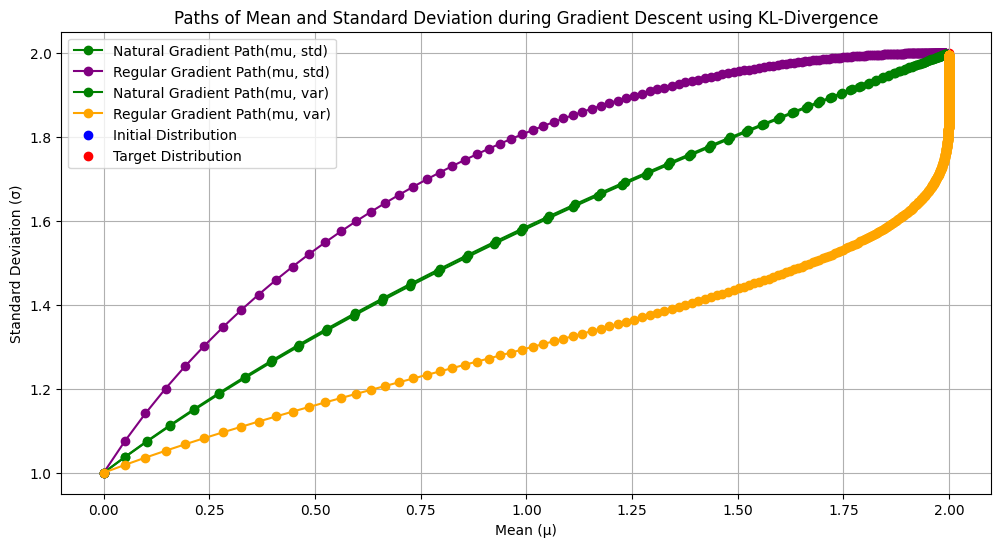

In [151]:
# Visualize the changes in mu and sigma
plt.figure(figsize=(12, 6))

# Plot the path of the means and standard deviations for natural gradient descent
plt.plot(mu_history_natural, sigma_history_natural, 'o-', color='green', label='Natural Gradient Path(mu, std)')

# Plot the path of the means and standard deviations for regular gradient descent
plt.plot(mu_history_regular, sigma_history_regular, 'o-', color='purple', label='Regular Gradient Path(mu, std)')

# Plot the path of the means and standard deviations for natural gradient descent
plt.plot(mu_history_natural_var, np.sqrt(var_history_natural), 'o-', color='green', label='Natural Gradient Path(mu, var)')

# Plot the path of the means and standard deviations for regular gradient descent
plt.plot(mu_history_regular_var, np.sqrt(var_history_regular), 'o-', color='orange', label='Regular Gradient Path(mu, var)')

# Mark the initial and target points
plt.scatter([mu_0], [sigma_0], color='blue', label='Initial Distribution')
plt.scatter([mu_1], [sigma_1], color='red', label='Target Distribution')

plt.xlabel('Mean (μ)')
plt.ylabel('Standard Deviation (σ)')
plt.title('Paths of Mean and Standard Deviation during Gradient Descent using KL-Divergence')
plt.legend()
plt.grid(True)
plt.show()
plt.show()

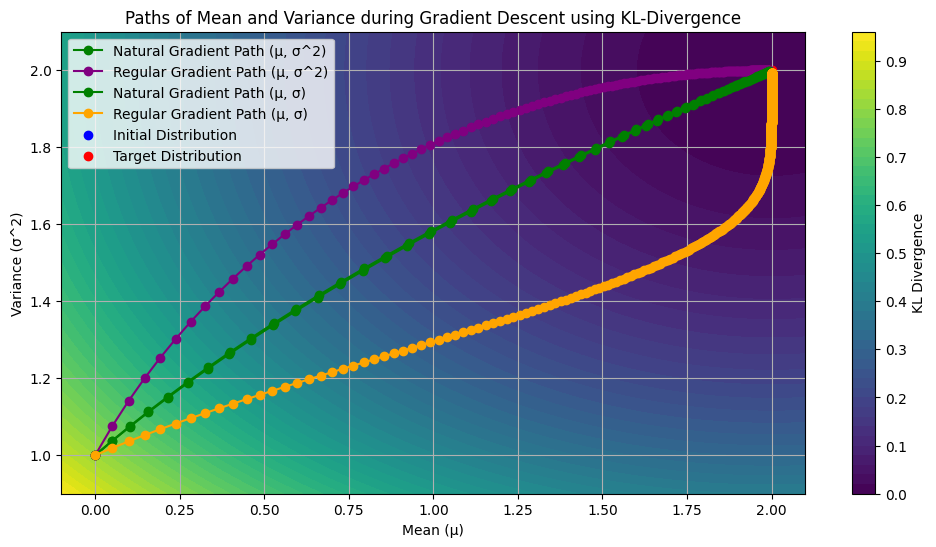

In [169]:
# Create a meshgrid for the loss landscape
mu_vals = np.linspace(mu_0 - 0.1, mu_1 + 0.1, 100)
sigma_vals = np.linspace(sigma_0 - 0.1, sigma_1 + 0.1, 100)
Mu, Sig = np.meshgrid(mu_vals, sigma_vals)
Loss = np.zeros_like(Mu)

# Compute the loss landscape
for i in range(Mu.shape[0]):
    for j in range(Mu.shape[1]):
        Loss[i, j] = kl_divergence_1d(Mu[i, j], Sig[i, j], mu_1, sigma_1)

# Plot the loss landscape
plt.figure(figsize=(12, 6))
plt.contourf(Mu, Sig, Loss, levels=50)
plt.colorbar(label='KL Divergence')

# Plot the path of the means and variances for natural gradient descent
plt.plot(mu_history_natural, sigma_history_natural, 'o-', color='green', label='Natural Gradient Path (μ, σ^2)')

# Plot the path of the means and variances for regular gradient descent
plt.plot(mu_history_regular, sigma_history_regular, 'o-', color='purple', label='Regular Gradient Path (μ, σ^2)')

# Plot the path of the means and standard deviations for natural gradient descent
plt.plot(mu_history_natural_var, np.sqrt(var_history_natural), 'o-', color='green', label='Natural Gradient Path (μ, σ)')

# Plot the path of the means and standard deviations for regular gradient descent
plt.plot(mu_history_regular_var, np.sqrt(var_history_regular), 'o-', color='orange', label='Regular Gradient Path (μ, σ)')

# Mark the initial and target points
plt.scatter([mu_0], [sigma_0], color='blue', label='Initial Distribution')
plt.scatter([mu_1], [sigma_1], color='red', label='Target Distribution')

plt.xlabel('Mean (μ)')
plt.ylabel('Variance (σ^2)')
plt.title('Paths of Mean and Variance during Gradient Descent using KL-Divergence')
plt.legend()
plt.grid(True)
plt.show()

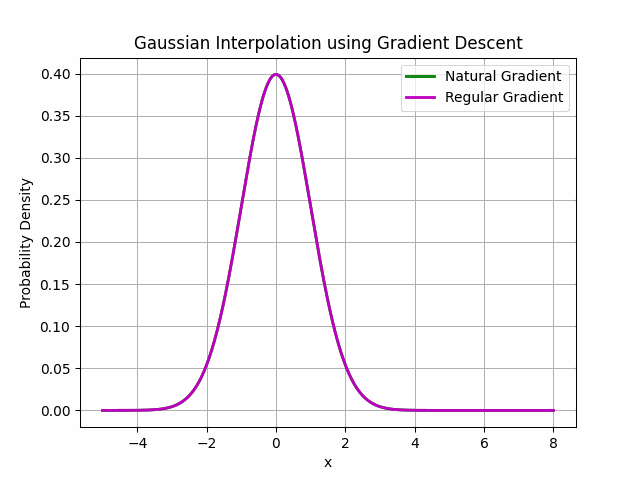

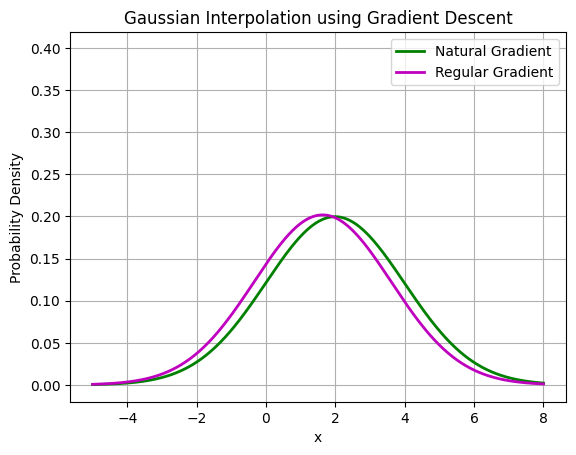

In [ ]:
import matplotlib.animation as animation

# Create an animation of the Gaussian being interpolated
fig, ax = plt.subplots()

x = np.linspace(-5, 8, 500)

line_natural, = ax.plot(x, np.exp(-(x - mu_0)**2 / (2 * sigma_0**2)) / (sigma_0 * np.sqrt(2 * np.pi)), 'g-', lw=2, label='Natural Gradient')
line_regular, = ax.plot(x, np.exp(-(x - mu_0)**2 / (2 * sigma_0**2)) / (sigma_0 * np.sqrt(2 * np.pi)), 'm-', lw=2, label='Regular Gradient')

def init():
    line_natural.set_ydata(np.exp(-(x - mu_0)**2 / (2 * sigma_0**2)) / (sigma_0 * np.sqrt(2 * np.pi)))
    line_regular.set_ydata(np.exp(-(x - mu_0)**2 / (2 * sigma_0**2)) / (sigma_0 * np.sqrt(2 * np.pi)))
    return line_natural, line_regular

def update(frame):
    mu_natural, sigma_natural = mu_history_natural[frame], sigma_history_natural[frame]
    mu_regular, sigma_regular = mu_history_regular[frame], sigma_history_regular[frame]
    line_natural.set_ydata(np.exp(-(x - mu_natural)**2 / (2 * sigma_natural**2)) / (sigma_natural * np.sqrt(2 * np.pi)))
    line_regular.set_ydata(np.exp(-(x - mu_regular)**2 / (2 * sigma_regular**2)) / (sigma_regular * np.sqrt(2 * np.pi)))
    return line_natural, line_regular

ani = animation.FuncAnimation(fig, update, frames=min(len(mu_history_natural),len(mu_history_regular)), init_func=init, blit=True, interval=100, repeat=False)

from IPython.display import Image
# Save the animation as a GIF

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gaussian Interpolation using Gradient Descent')
plt.legend()
plt.grid(True)
ani.save('gaussian_interpolation_kl.gif', writer='pillow', fps=10)
Image(open('gaussian_interpolation_kl.gif','rb').read())

In [174]:
import numpy as np
import matplotlib.pyplot as plt

# Wasserstein distance between two 1D Gaussians
def wasserstein_distance_1d(mu_0, sigma_0, mu_1, sigma_1):
    return np.sqrt((mu_0 - mu_1) ** 2 + (sigma_0 - sigma_1) ** 2)

# Gradient of the Wasserstein distance for 1D Gaussians
def wasserstein_gradient_1d(mu_0, sigma_0, mu_1, sigma_1):
    distance = wasserstein_distance_1d(mu_0, sigma_0, mu_1, sigma_1)
    grad_mu = (mu_0 - mu_1) / distance
    grad_sigma = (sigma_0 - sigma_1) / distance
    return grad_mu, grad_sigma

# Natural gradient descent update for 1D Gaussians using Wasserstein distance
def natural_gradient_descent_1d(mu_0, sigma_0, mu_1, sigma_1, learning_rate=0.01, epsilon=1e-3, max_iter=10000):
    mu = mu_0
    sigma = sigma_0

    mu_history = [mu]
    sigma_history = [sigma]

    iterations = 0

    while True:
        grad_mu, grad_sigma = wasserstein_gradient_1d(mu, sigma, mu_1, sigma_1)

        # Update mean and standard deviation using natural gradient
        mu -= learning_rate * sigma ** 2 * grad_mu
        sigma -= learning_rate * sigma ** 2 * grad_sigma / 2

        mu_history.append(mu)
        sigma_history.append(sigma)

        loss = wasserstein_distance_1d(mu, sigma, mu_1, sigma_1)

        iterations += 1

        if abs(loss) < epsilon or iterations >= max_iter:
            break

    print("Final Loss:", loss)
    print("Total iterations:", iterations)

    return np.array(mu_history), np.array(sigma_history)

# Regular gradient descent update for 1D Gaussians using Wasserstein distance
def regular_gradient_descent_1d(mu_0, sigma_0, mu_1, sigma_1, learning_rate=0.01, epsilon=1e-3, max_iter=10000):
    mu = mu_0
    sigma = sigma_0

    mu_history = [mu]
    sigma_history = [sigma]

    iterations = 0

    while True:
        grad_mu, grad_sigma = wasserstein_gradient_1d(mu, sigma, mu_1, sigma_1)

        # Update mean and standard deviation using regular gradient
        mu -= learning_rate * grad_mu
        sigma -= learning_rate * grad_sigma

        mu_history.append(mu)
        sigma_history.append(sigma)

        loss = wasserstein_distance_1d(mu, sigma, mu_1, sigma_1)

        iterations += 1

        if abs(loss) < epsilon or iterations >= max_iter:
            break

    print("Final Loss:", loss)
    print("Total iterations:", iterations)

    return np.array(mu_history), np.array(sigma_history)

# Define the initial and target Gaussian distributions
mu_0 = 0.0   # Mean of the initial distribution
sigma_0 = 1  # Standard deviation of the initial distribution

mu_1 = 2.0   # Mean of the target distribution
sigma_1 = 2  # Standard deviation of the target distribution

# Perform natural gradient descent
learning_rate = 1e-2
epsilon = 1e-2

mu_history_natural, sigma_history_natural = natural_gradient_descent_1d(mu_0, sigma_0, mu_1, sigma_1, learning_rate, epsilon)
mu_history_regular, sigma_history_regular = regular_gradient_descent_1d(mu_0, sigma_0, mu_1, sigma_1, learning_rate, epsilon)


Final Loss: 0.0037260262484964334
Total iterations: 164
Final Loss: 0.006067977499786009
Total iterations: 223


In [175]:
import numpy as np
import matplotlib.pyplot as plt

# Wasserstein distance between two 1D Gaussians
def wasserstein_distance_1d(mu_0, var_0, mu_1, var_1):
    return np.sqrt((mu_0 - mu_1) ** 2 + (np.sqrt(var_0) - np.sqrt(var_1)) ** 2)

# Gradient of the Wasserstein distance for 1D Gaussians
def wasserstein_gradient_1d(mu_0, var_0, mu_1, var_1):
    distance = wasserstein_distance_1d(mu_0, sigma_0, mu_1, sigma_1)
    grad_mu = (mu_0 - mu_1) / distance
    grad_sigma = (1 - np.sqrt(var_1 / var_0)) / (2 * distance)
    return grad_mu, grad_sigma

# Natural gradient descent update for 1D Gaussians
def natural_gradient_descent_1d(mu_0, var_0, mu_1, var_1, learning_rate=0.01, epsilon=1e-3):
    mu = mu_0
    var = var_0

    mu_history = [mu]
    var_history = [var]

    iterations = 0

    while True:
        grad_mu, grad_var = wasserstein_gradient_1d(mu, var, mu_1, var_1)

        # Update mean and variance using natural gradient
        mu -= learning_rate * var * grad_mu
        var -= learning_rate * 2 * var ** 2 * grad_var

        mu_history.append(mu)
        var_history.append(var)

        loss = wasserstein_distance_1d(mu, var, mu_1, var_1)

        iterations += 1

        if abs(loss) < epsilon:
            break

    print("Final Loss:", loss)
    print("Total iterations:", iterations)

    return np.array(mu_history), np.array(var_history)

# Regular gradient descent update for 1D Gaussians
def regular_gradient_descent_1d(mu_0, var_0, mu_1, var_1, learning_rate=0.01, epsilon=1e-3):
    mu = mu_0
    var = var_0

    mu_history = [mu]
    var_history = [var]

    iterations = 0

    while True:
        grad_mu, grad_var = wasserstein_gradient_1d(mu, var, mu_1, var_1)

        # Update mean and variance using regular gradient
        mu -= learning_rate * grad_mu
        var -= learning_rate * grad_var

        mu_history.append(mu)
        var_history.append(var)

        loss = wasserstein_distance_1d(mu, var, mu_1, var_1)

        iterations += 1

        if abs(loss) < epsilon:
            break

    print("Final Loss:", loss)
    print("Total iterations:", iterations)

    return np.array(mu_history), np.array(var_history)

# Define the initial and target Gaussian distributions
mu_0 = 0.0   # Mean of the initial distribution
var_0 = 1  # Standard deviation of the initial distribution

mu_1 = 2.0   # Mean of the target distribution
var_1 = 4  # Standard deviation of the target distribution

# Perform natural gradient descent
learning_rate = 1e-2
epsilon = 1e-2

mu_history_natural_var, var_history_natural = natural_gradient_descent_1d(mu_0, var_0, mu_1, var_1, learning_rate, epsilon)
mu_history_regular_var, var_history_regular = regular_gradient_descent_1d(mu_0, var_0, mu_1, var_1, learning_rate, epsilon)


Final Loss: 0.00978673993058011
Total iterations: 210
Final Loss: 0.009989989264070243
Total iterations: 2595


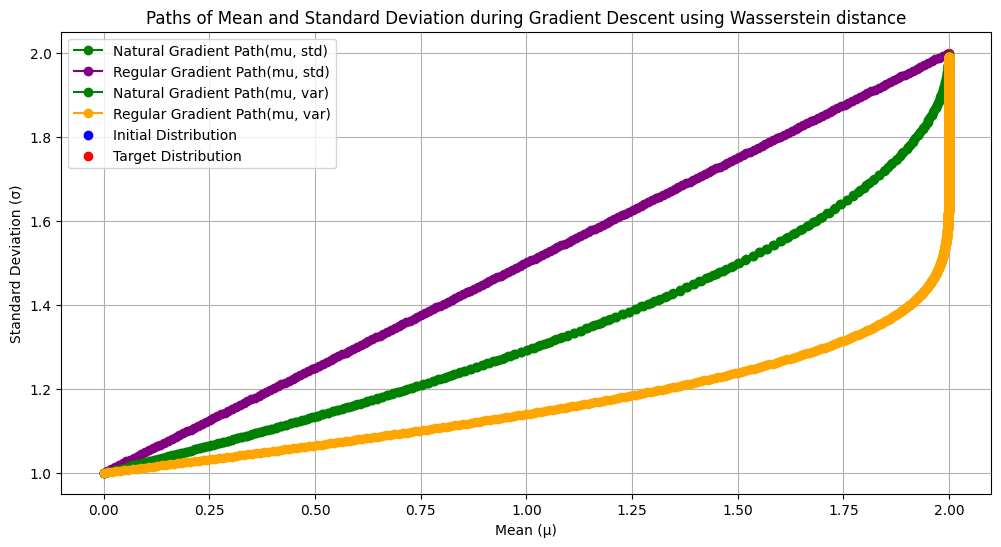

In [176]:
# Visualize the changes in mu and sigma
plt.figure(figsize=(12, 6))

# Plot the path of the means and standard deviations for natural gradient descent
plt.plot(mu_history_natural, sigma_history_natural, 'o-', color='green', label='Natural Gradient Path(mu, std)')

# Plot the path of the means and standard deviations for regular gradient descent
plt.plot(mu_history_regular, sigma_history_regular, 'o-', color='purple', label='Regular Gradient Path(mu, std)')

# Plot the path of the means and standard deviations for natural gradient descent
plt.plot(mu_history_natural_var, np.sqrt(var_history_natural), 'o-', color='green', label='Natural Gradient Path(mu, var)')

# Plot the path of the means and standard deviations for regular gradient descent
plt.plot(mu_history_regular_var, np.sqrt(var_history_regular), 'o-', color='orange', label='Regular Gradient Path(mu, var)')

# Mark the initial and target points
plt.scatter([mu_0], [sigma_0], color='blue', label='Initial Distribution')
plt.scatter([mu_1], [sigma_1], color='red', label='Target Distribution')

plt.xlabel('Mean (μ)')
plt.ylabel('Standard Deviation (σ)')
plt.title('Paths of Mean and Standard Deviation during Gradient Descent using Wasserstein distance')
plt.legend()
plt.grid(True)
plt.show()
plt.show()

<ipython-input-193-f4a9b67dcfd0>:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, pdf_natural, 'b-', linestyle='-', alpha=0.99 ** step)
<ipython-input-193-f4a9b67dcfd0>:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, pdf_regular, 'r-', linestyle='--', alpha=0.99 ** step)


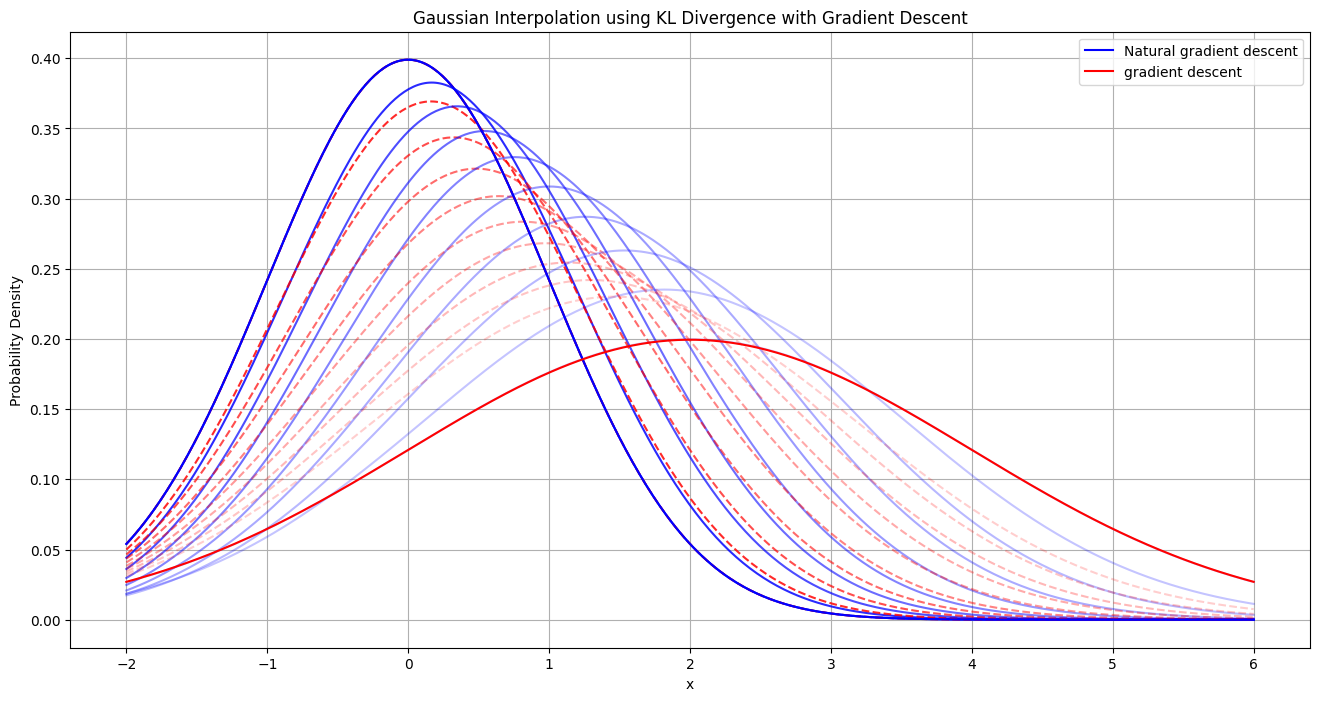

In [193]:
# Plot the Gaussian distributions at 10 steps
steps_to_plot = np.linspace(0, len(mu_history_natural) - 1, 10, dtype=int)

plt.figure(figsize=(16, 8))

x = np.linspace(-2, 6, 500)

for step in steps_to_plot:
    mu_natural = mu_history_natural[step]
    sigma_natural = sigma_history_natural[step]
    pdf_natural = np.exp(-(x - mu_natural)**2 / (2 * sigma_natural**2)) / (sigma_natural * np.sqrt(2 * np.pi))
    plt.plot(x, pdf_natural, 'b-', linestyle='-', alpha=0.99 ** step)

    mu_regular = mu_history_regular[step]
    sigma_regular = sigma_history_regular[step]
    pdf_regular = np.exp(-(x - mu_regular)**2 / (2 * sigma_regular**2)) / (sigma_regular * np.sqrt(2 * np.pi))
    plt.plot(x, pdf_regular, 'r-', linestyle='--', alpha=0.99 ** step)

# Plot the initial and target distributions
plt.plot(x, np.exp(-(x - mu_0)**2 / (2 * sigma_0**2)) / (sigma_0 * np.sqrt(2 * np.pi)), 'b-', alpha=1, label='Natural gradient descent')
plt.plot(x, np.exp(-(x - mu_1)**2 / (2 * sigma_1**2)) / (sigma_1 * np.sqrt(2 * np.pi)), 'r-', alpha=1, label='gradient descent')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gaussian Interpolation using KL Divergence with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

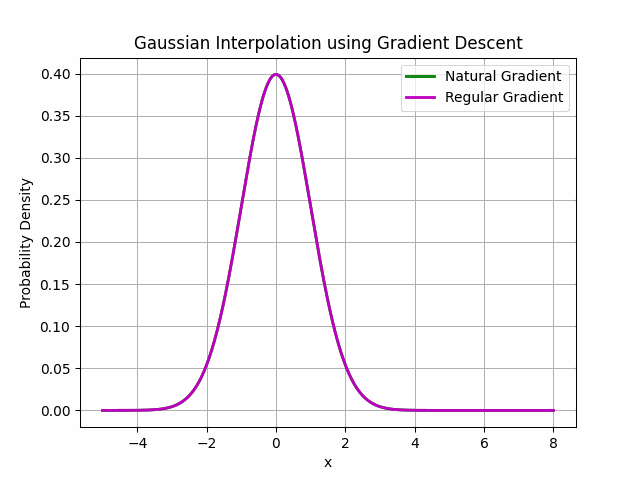

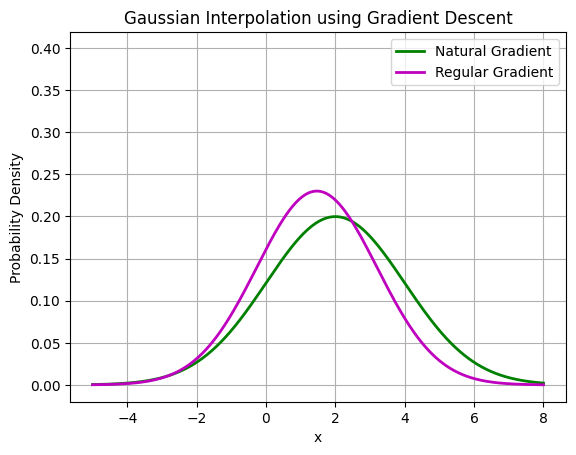

In [ ]:
import matplotlib.animation as animation

# Create an animation of the Gaussian being interpolated
fig, ax = plt.subplots()

x = np.linspace(-5, 8, 500)

line_natural, = ax.plot(x, np.exp(-(x - mu_0)**2 / (2 * sigma_0**2)) / (sigma_0 * np.sqrt(2 * np.pi)), 'g-', lw=2, label='Natural Gradient')
line_regular, = ax.plot(x, np.exp(-(x - mu_0)**2 / (2 * sigma_0**2)) / (sigma_0 * np.sqrt(2 * np.pi)), 'm-', lw=2, label='Regular Gradient')

def init():
    line_natural.set_ydata(np.exp(-(x - mu_0)**2 / (2 * sigma_0**2)) / (sigma_0 * np.sqrt(2 * np.pi)))
    line_regular.set_ydata(np.exp(-(x - mu_0)**2 / (2 * sigma_0**2)) / (sigma_0 * np.sqrt(2 * np.pi)))
    return line_natural, line_regular

def update(frame):
    mu_natural, sigma_natural = mu_history_natural[frame], sigma_history_natural[frame]
    mu_regular, sigma_regular = mu_history_regular[frame], sigma_history_regular[frame]
    line_natural.set_ydata(np.exp(-(x - mu_natural)**2 / (2 * sigma_natural**2)) / (sigma_natural * np.sqrt(2 * np.pi)))
    line_regular.set_ydata(np.exp(-(x - mu_regular)**2 / (2 * sigma_regular**2)) / (sigma_regular * np.sqrt(2 * np.pi)))
    return line_natural, line_regular

ani = animation.FuncAnimation(fig, update, frames=min(len(mu_history_natural),len(mu_history_regular)), init_func=init, blit=True, interval=100, repeat=False)

from IPython.display import Image
# Save the animation as a GIF

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gaussian Interpolation using Gradient Descent')
plt.legend()
plt.grid(True)
ani.save('gaussian_interpolation_wasserstein.gif', writer='pillow', fps=10)
Image(open('gaussian_interpolation_wasserstein.gif','rb').read())